In [ ]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
full_dct = {}
real_chrs = {str(i) for i in range(1, 23)}.union({'X', 'Y'})

for patient in range(1, 16):
    positions_dct = {}
    for time in (0, 1, 30, 90):
        if patient == 2 and time == 30:
            continue
        df = pd.read_csv(f"/media/leon/DISK2/icig/done/all_stats/s{patient}_{time}R.stat", sep='\t')
        positions_dct[time] = {f"{df.CHR[i]}_{df.POS[i]}" for i in range(len(df)) if df.DP_total[i] > 250 and df.CHR[i] in real_chrs}
    full_dct[patient] = positions_dct

In [11]:
lengths = {}
for i in full_dct:
    lengths[i] = {}
    for j in full_dct[i]:
        lengths[i][j] = len(full_dct[i][j])
pd.DataFrame(lengths)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,8944,11193.0,9697,9777,4766,10424,6397,9217,430,8819,10984,1945,8702,9750,11473
1,8402,11492.0,11038,8991,12080,9545,8833,8554,8990,8644,1398,277,10687,11466,1056
30,8114,NaN,9212,9626,952,11851,8967,8973,9095,1951,937,10121,10903,1263,1643
90,7826,8340.0,8798,7013,1323,8567,8209,9110,8864,880,11776,9336,8546,440,9568


In [21]:
samples = [(i, j) for i in range(1, 16) for j in (0, 1, 30, 90) if not (i, j) == (2, 30)]
intersection_dct = {}

for s in samples:
    intersection_dct[f"s{s[0]}_{s[1]}"] = {
        f"s{i[0]}_{i[1]}" : round(len(full_dct[s[0]][s[1]].intersection(full_dct[i[0]][i[1]])) / min(len(full_dct[s[0]][s[1]]), len(full_dct[i[0]][i[1]])), 2)
        for i in samples}
intersection_df = pd.DataFrame(intersection_dct)
# intersection_df

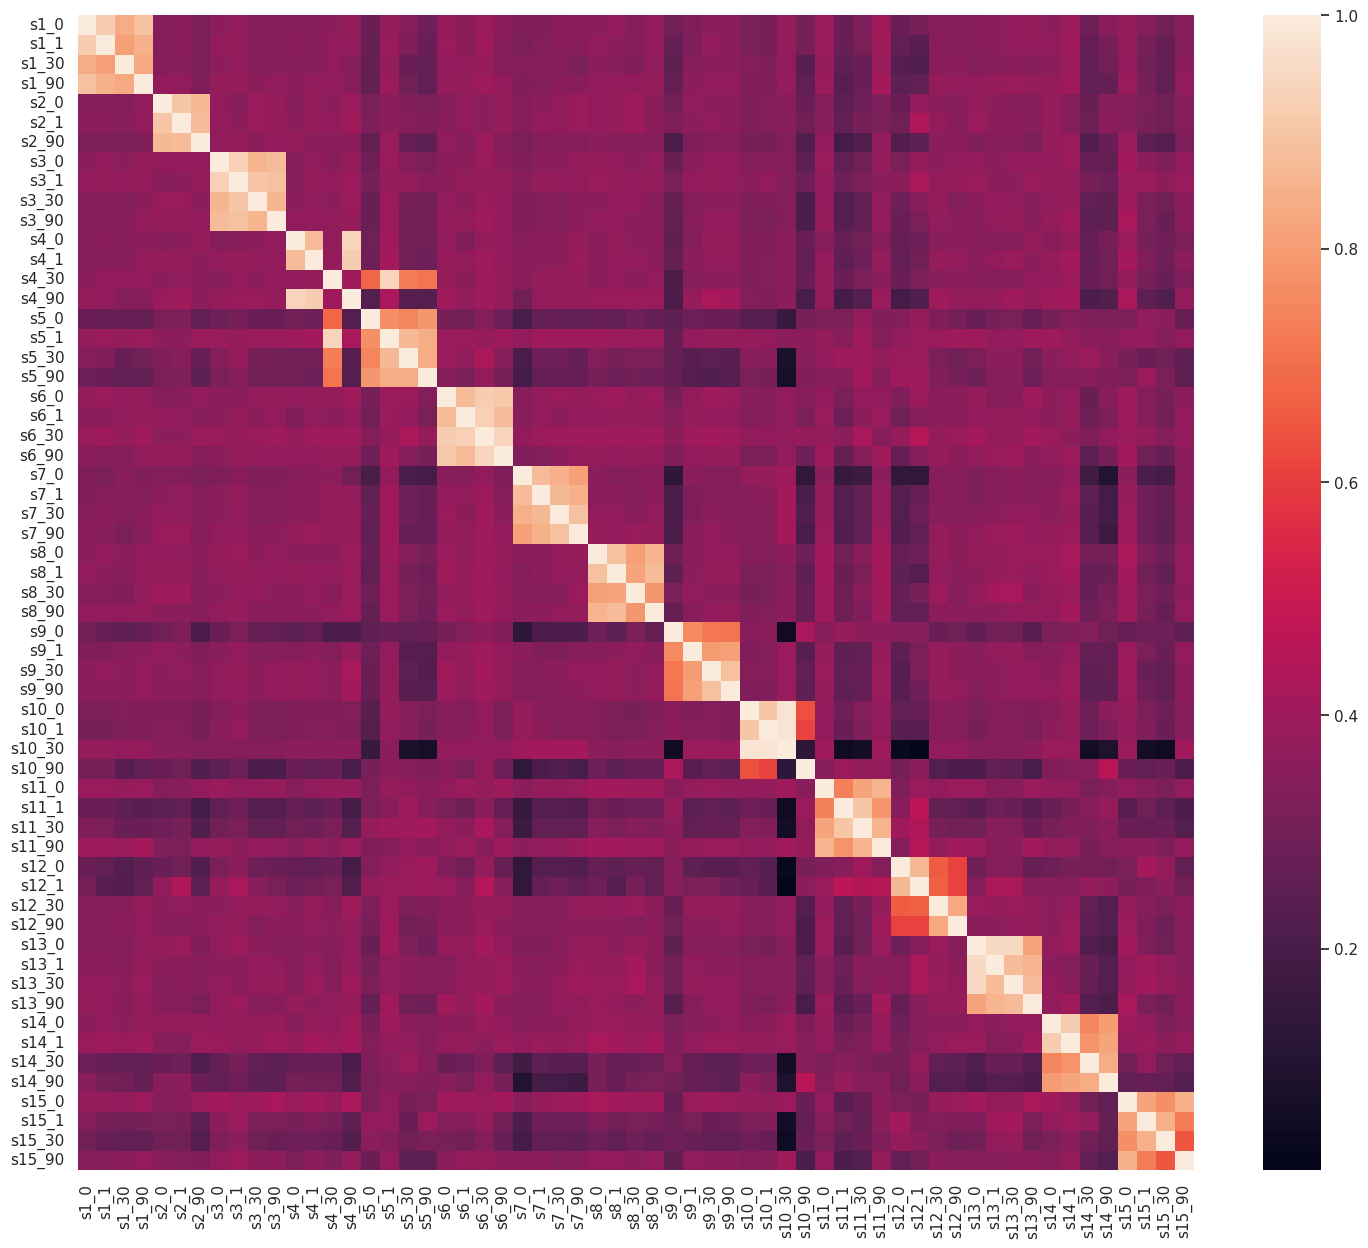

<Figure size 7200x6000 with 0 Axes>

In [20]:
sns.set_theme(rc={'figure.figsize':(18, 15)})
sns_plot = sns.heatmap(intersection_df)
plt.figure(figsize=(18, 15), dpi=400)
plt.savefig('samples_heatmap.png')